# Default box

In [1]:
import sys
sys.path.append('../')

from data import datasets
from data import transforms, target_transforms
from ssd.models.ssd300 import SSD300

In [2]:
transform = transforms.Compose(
    [transforms.Resize((300, 300)),
     transforms.ToTensor()]
)
target_transform = target_transforms.Compose(
    [target_transforms.Ignore(difficult=True),
     target_transforms.ToCentroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums),
     target_transforms.ToTensor()]
)

dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                           transform=transform, target_transform=target_transform)


model = SSD300(datasets.VOC_class_nums, batch_norm=False)
defaultbox = model.defaultBox

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2

from ssd.core.boxes import centroids2minmax
from ssd.core.inference import toVisualizeRectangleimg, tensor2cvimg

<IPython.core.display.Javascript object>


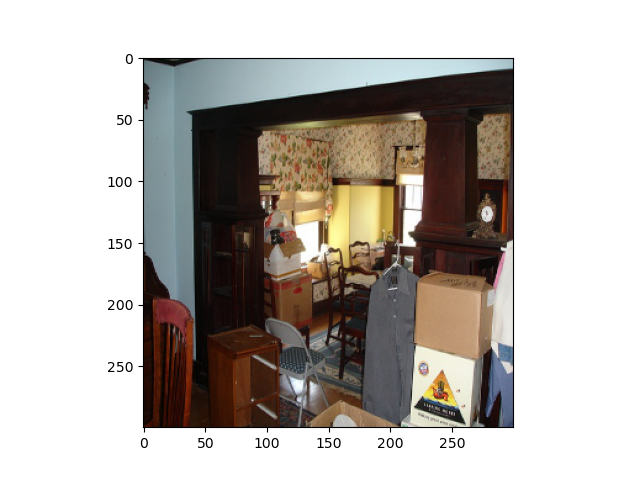

In [4]:
img, targets = dataset[0]

plt.figure()
plt.imshow(tensor2cvimg(img))

[38, 38] 5776 0


<IPython.core.display.Javascript object>


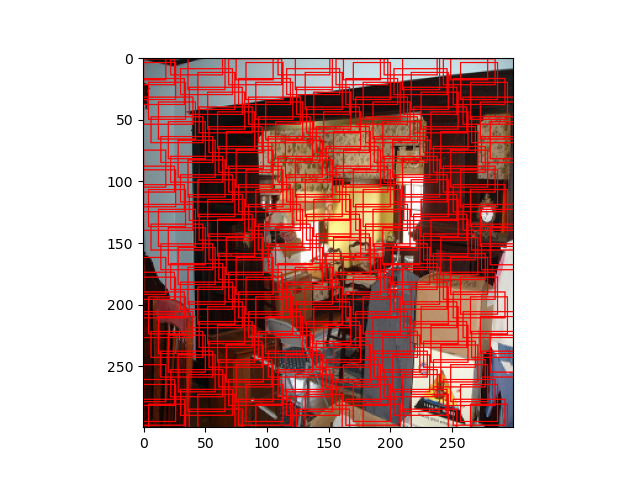

[19, 19] 2166 5776


<IPython.core.display.Javascript object>


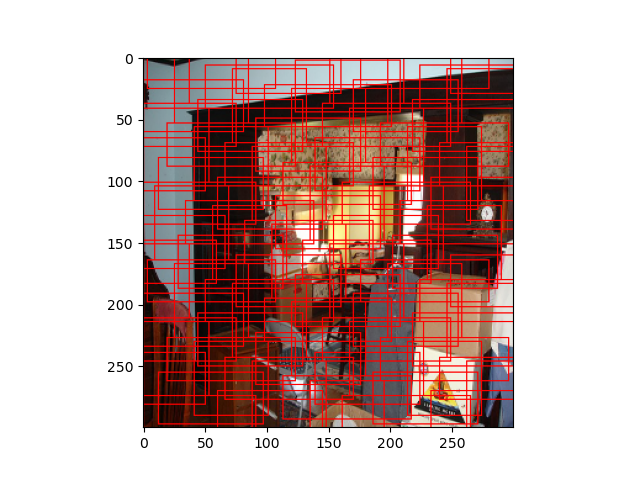

[10, 10] 600 7942


<IPython.core.display.Javascript object>


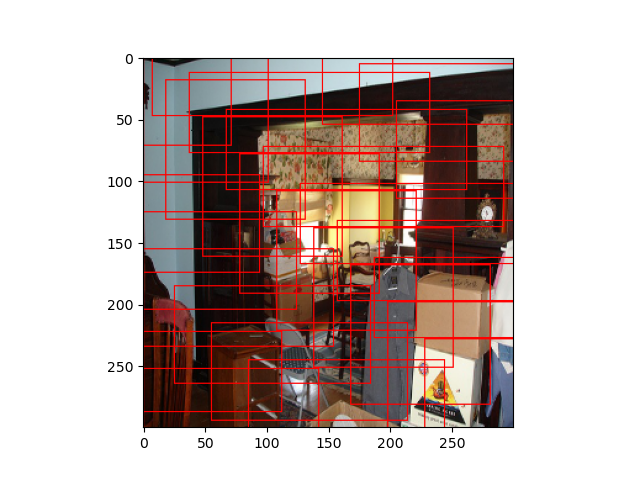

[5, 5] 150 8542


<IPython.core.display.Javascript object>


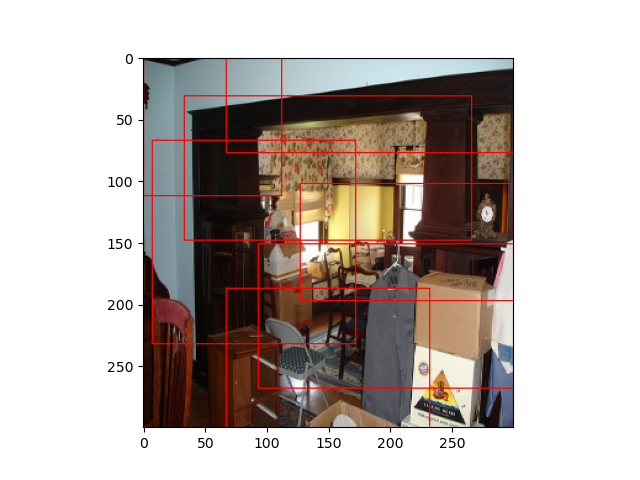

[3, 3] 36 8692


<IPython.core.display.Javascript object>


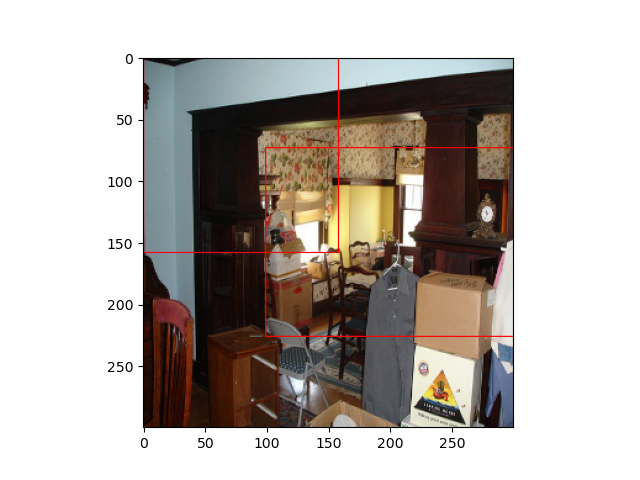

[1, 1] 4 8728


<IPython.core.display.Javascript object>


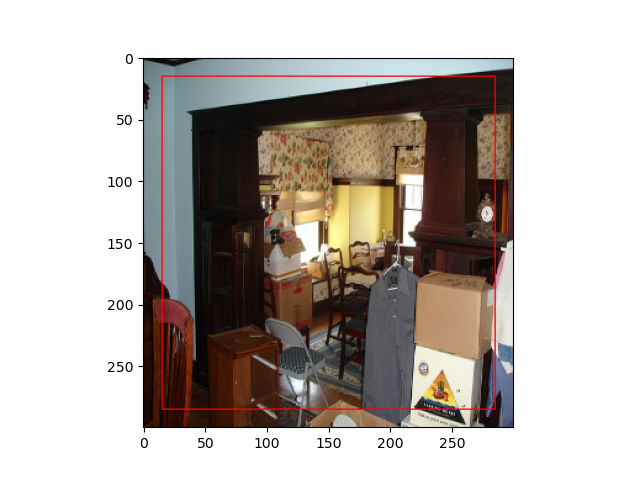

In [5]:
box_s = 0
for fmap_size, box_num in zip(defaultbox.fmap_sizes, defaultbox.dbox_num_per_fmap):
    print(fmap_size, box_num, box_s)
    #resized_img = cv2.resize(img, tuple(fmap_size))
    
    dboxes = defaultbox.dboxes
    
    #resized_img = box_show(resized_img, dboxes[58::1000])
    dbox_img = toVisualizeRectangleimg(img, dboxes[box_s:box_s+box_num:22], thickness=1)
    
    plt.figure()
    #plt.imshow(resized_img)
    plt.imshow(dbox_img)

    box_s += box_num

In [6]:
centroids2minmax(dboxes)[-1]*300

tensor([ 54.5406,   0.0000, 245.4594, 300.0000])

In [7]:
sum(defaultbox.dbox_num_per_fmap)

8732